### LEAGUE OF LEGENDS MATCH SCORE PREDICTION

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from plotly import tools
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("../input"))
lol=pd.read_csv("../input/games.csv")

# Any results you write to the current directory are saved as output.

['summoner_spell_info.json', 'champion_info_2.json', 'champion_info.json', 'games.csv']


League of Legends (abbreviated LoL) is a multiplayer online battle arena video game developed and published by Riot Games for Microsoft Windows and macOS. 

In League of Legends, players assume the role of an unseen "summoner" that controls a "champion" with unique abilities and battle against a team of other players or computer-controlled champions. The goal is usually to destroy the opposing team's "nexus", a structure that lies at the heart of a base protected by defensive structures, although other distinct game modes exist as well. 

Each League of Legends match is discrete, with all champions starting off fairly weak but increasing in strength by accumulating items and experience over the course of the game.

![](https://cdn.webrazzi.com/uploads/2016/09/league-of-legends.jpg)

In this kernel ,League of Legends ranked matches were analyzed and a decision tree classification algorithm was developed to predict match scores. To develop this algorithm:

- Winner (1 = team1, 2 = team2)

- First Baron, dragon, tower, blood, inhibitor and Rift Herald (1 = team1, 2 = team2, 0 = none)

- The number of tower, inhibitor, Baron and dragon kills each team has 

features were used.

* All information were taken from Wikipedia.

#### Contents:

1. [Game](#1)
2. [Data Analysis](#2)
3. [Decision Tree with Grid Search Method](#3)
4. [Prediction](#4)

<a id="1"></a> <br>
**GAME**

Summoner's Rift is the most popular map in League of Legends. 

On this map type, two teams of five players compete to destroy an enemy building called a Nexus, which is guarded by the enemy team and a number of defensive structures called turrets, or towers. 

One nexus is located in each enemy base on opposite sides of the map, in the lower-left and upper-right hand corners. 

These structures continually create weak non-player characters known as minions, which advance toward the enemy base along three paths: top, middle, and bottom lanes. 

Players compete to advance these waves of minions into the enemy base, which allows them to destroy enemy structures and ultimately win the match. 

Between lanes are neutral areas of the map known as the 'jungle', arrayed in four quadrants. A shallow river divides the map between the teams, but doesn't actually impede movement; all champions can wade through it no differently than dry land.

![](http://www.wikizero.biz/index.php?q=aHR0cDovL3VwbG9hZC53aWtpbWVkaWEub3JnL3dpa2lwZWRpYS9jb21tb25zL3RodW1iL2QvZGMvTWFwX29mX01PQkEuc3ZnLzI0MHB4LU1hcF9vZl9NT0JBLnN2Zy5wbmc)

Figure above shows a simplified representation of Summoner's Rift. The yellow paths are the "lanes" where endless waves of troops known as minions march; blue and red dots are the defensive turrets that defend the lanes. Not pictured are the two turrets that flank each Nexus – the ultimate goal of the game, which are within each team's base in their corner. The dotted black line is the river that divides the sides.

Each team wishes to defend their own structures and destroy the other team's structures. These include:

**Towers – ** Each lane is guarded by powerful defensive structures called turrets or towers. Every team has 11 towers in total. 

**Inhibitor –** Each lane contains one Inhibitor. A lane's Inhibitor can be attacked after a team has destroyed the three turrets guarding its lane.

**Elemental Drakes/Elder Dragon –** Elemental drakes are powerful monsters located in the bottom half of the river. All members of the team that kills the drake are provided with buffs that last the entire game and accrue cumulatively. The drakes are flavored after the Four Elements, with each drake granting a thematically appropriate buff. A random elemental drake will respawn six minutes after the previous one is killed. The Elder Dragon spawns instead after 35 minutes have passed in-game. When killed, it provides a stronger buff than an individual elemental drake, but is temporary, unlike the earlier drake rewards.

**Rift Herald –** The Rift Herald is a powerful enemy located in the upper side of the River. Killing the Rift Herald allows it to be summoned again as a battering ram to attack enemy towers.

**Baron Nashor – ** Baron Nashor is the most powerful neutral enemy, located in the upper side of the River. It will spawn after twenty minutes, replacing the Rift Herald.

**Nexus –** Each team has a Nexus that can only be damaged once all the turrets in a lane, that lane's inhibitor and the Nexus turrets are destroyed. Destruction of the enemy team's Nexus ends the game.

In [2]:
data=lol[["winner","firstBlood","firstTower","firstInhibitor","firstBaron","firstDragon","firstRiftHerald","t1_towerKills","t1_inhibitorKills",'t1_baronKills',
       't1_dragonKills','t2_towerKills','t2_inhibitorKills', 't2_baronKills', 't2_dragonKills'
       ]]

In [3]:
data.drop([524,839,867,5325,5340,6472,7408,7430,7570,7711,7874,7900,3858,4031,4467,4551,4646,4696,4897,4907,5002,5027,1241,1347,1452,1712,1962,2681,2799,2837,2960,3010,3093,3234,3325,3534,3634,3659,3747,3806,3848],inplace=True)
data=data.reset_index()
data.drop(["index"],axis=1,inplace=True)

<a id="2"></a> <br>
**DATA ANALYSIS**

Following table shows first 5 entries of dataset.

In [4]:
data.head()

winner  firstBlood       ...        t2_baronKills  t2_dragonKills
0       1           2       ...                    0               1
1       1           1       ...                    0               0
2       1           2       ...                    0               1
3       1           1       ...                    0               0
4       1           2       ...                    0               1

[5 rows x 15 columns]

Now let's check the data set for missing data.

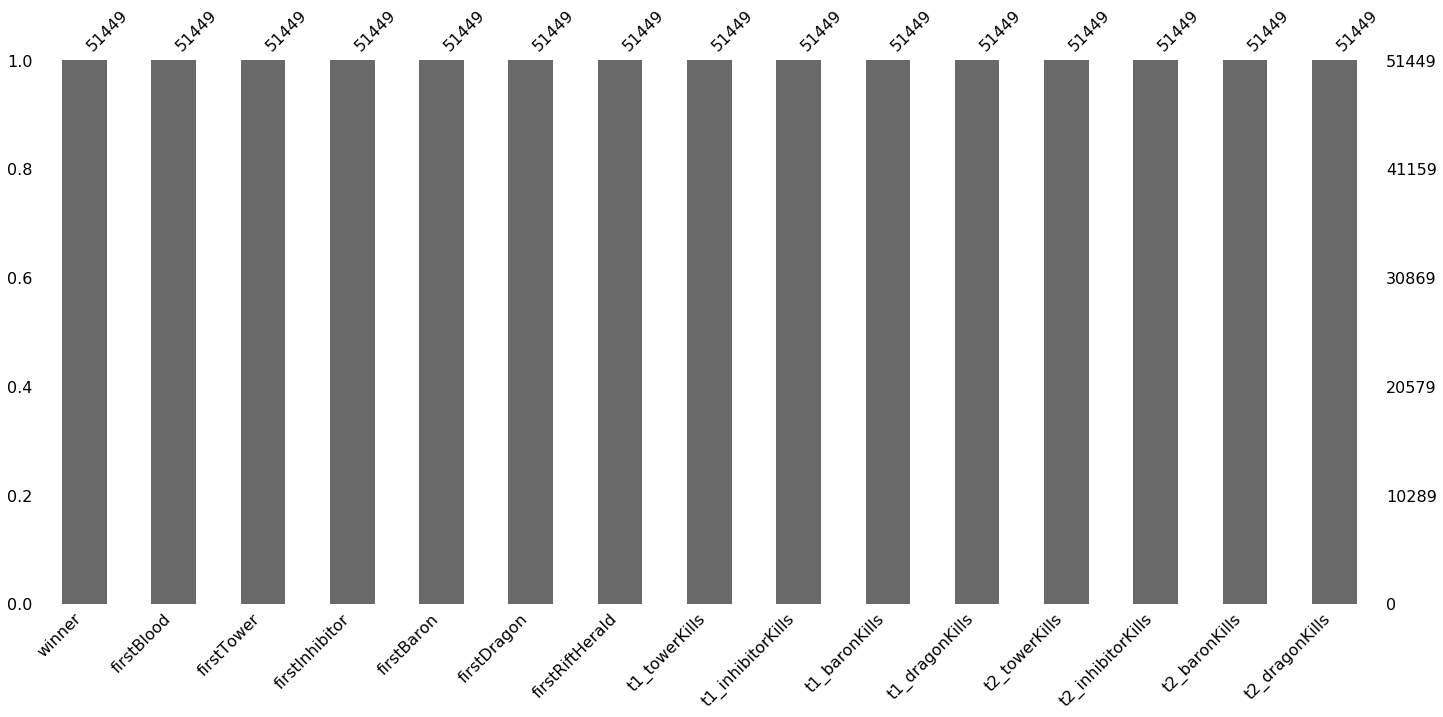

In [5]:
import missingno as msno
msno.bar(data)
plt.show()

In [6]:
first_team=data[data.winner==1]
second_team=data[data.winner==2]

Following subplots shows probabilities of Different Features when a team wins.

For example 

In matches with first team win:

- The probability of taking first blood of first team is about %59.
- The probability of taking first blood of second team is about %39.
- The probability of taking first blood of any team is about %0.98 (early surrender)

In matches with second team win:

- The probability of taking first blood of first team is about %41.
- The probability of taking first blood of second team is about %57.
- The probability of taking first blood of any team is about %0.1 (early surrender)

etc..

and also we see that the most important factor in winning matches is to take the **first inhibitor** or the **first tower**.

In [7]:
trace1 = go.Histogram(x=first_team.firstBlood, text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="crimson",line=dict(color='black', width=2)),opacity=0.75)

trace2 = go.Histogram(x=second_team.firstBlood,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="blue",line=dict(color='black', width=2)),opacity=0.75)

trace3 = go.Histogram(x=first_team.firstTower,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="grey",line=dict(color='black', width=2)),opacity=0.75)

trace4 = go.Histogram(x=second_team.firstTower,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="yellow",line=dict(color='black', width=2)),opacity=0.75)

trace5 = go.Histogram(x=first_team.firstBaron,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="pink",line=dict(color='black', width=2)),opacity=0.75)

trace6 = go.Histogram(x=second_team.firstBaron,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="green",line=dict(color='black', width=2)),opacity=0.7)

trace7 = go.Histogram(x=first_team.firstInhibitor,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="purple",line=dict(color='black', width=2)),opacity=0.75)

trace8 = go.Histogram(x=second_team.firstInhibitor,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="slateblue",line=dict(color='black', width=2)),opacity=0.7)

trace9 = go.Histogram(x=first_team.firstDragon,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="brown",line=dict(color='black', width=2)),opacity=0.75)                                

trace10 = go.Histogram(x=second_team.firstDragon,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="red",line=dict(color='black', width=2)),opacity=0.7)

trace11 = go.Histogram(x=first_team.firstRiftHerald,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="orange",line=dict(color='black', width=2)),opacity=0.75)                                

trace12 = go.Histogram(x=second_team.firstRiftHerald,text=['0-None', '1- First Team', '2- Second Team'],histnorm='probability',marker=dict(color="yellowgreen",line=dict(color='black', width=2)),opacity=0.7)

fig = tools.make_subplots(rows=6, cols=2,vertical_spacing=0.1,print_grid=False )
 
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
fig.append_trace(trace5, 3, 1)
fig.append_trace(trace6, 3, 2)
fig.append_trace(trace7, 4, 1)
fig.append_trace(trace8, 4, 2)
fig.append_trace(trace9, 5, 1)
fig.append_trace(trace10, 5, 2)
fig.append_trace(trace11, 6, 1)
fig.append_trace(trace12, 6, 2)
fig['layout'].update( annotations=[dict(showarrow=False,text="Teams",x=0.5,y=-0.1,xref="paper",yref="paper",font=dict(size=15)),dict(showarrow=False, text='Probabilites',x=-0.08,y=0.5,xref="paper",yref="paper",textangle=270,font=dict(size=15)),
                                  dict(showarrow=False,text="First Blood When First Team wins",x=0.13,y=1.03,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Blood When Second Team wins",x=0.88,y=1.03,xref="paper",yref="paper",font=dict(size=10)),
                                   dict(showarrow=False,text="First Tower When First Team wins",x=0.13,y=0.85,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Tower When Second Team wins",x=0.88,y=0.85,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Baron When First Team wins",x=0.13,y=0.65,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Baron When Second Team wins",x=0.88,y=0.65,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Inhibitor When First Team wins",x=0.13,y=0.46,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Inhibitor When Second Team wins",x=0.88,y=0.46,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Dragon When First Team wins",x=0.13,y=0.28,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Dragon When Second Team wins",x=0.88,y=0.28,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Rift Herald When First Team wins",x=0.13,y=0.10,xref="paper",yref="paper",font=dict(size=10)),
                                  dict(showarrow=False,text="First Rift Herald When Second Team wins",x=0.90,y=0.10,xref="paper",yref="paper",font=dict(size=10))],                     
            
                     height=800,font=dict(family="Franklin Gothic", size=10),showlegend=False, bargap=0.4,title="Probabilities of First Blood etc. When a Team Wins",plot_bgcolor="snow" ,bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)')

iplot(fig)


Following table and subplots show average number of tower, inhibitor, Baron and dragon kills each team has.

In [8]:
data_new=data[["winner","t1_towerKills","t1_inhibitorKills","t1_baronKills","t1_dragonKills","t2_towerKills","t2_inhibitorKills","t2_baronKills","t2_dragonKills"]]
data_new.groupby("winner").mean()


t1_towerKills       ...        t2_dragonKills
winner                      ...                      
1            8.607006       ...              0.804617
2            2.729627       ...              2.021092

[2 rows x 8 columns]

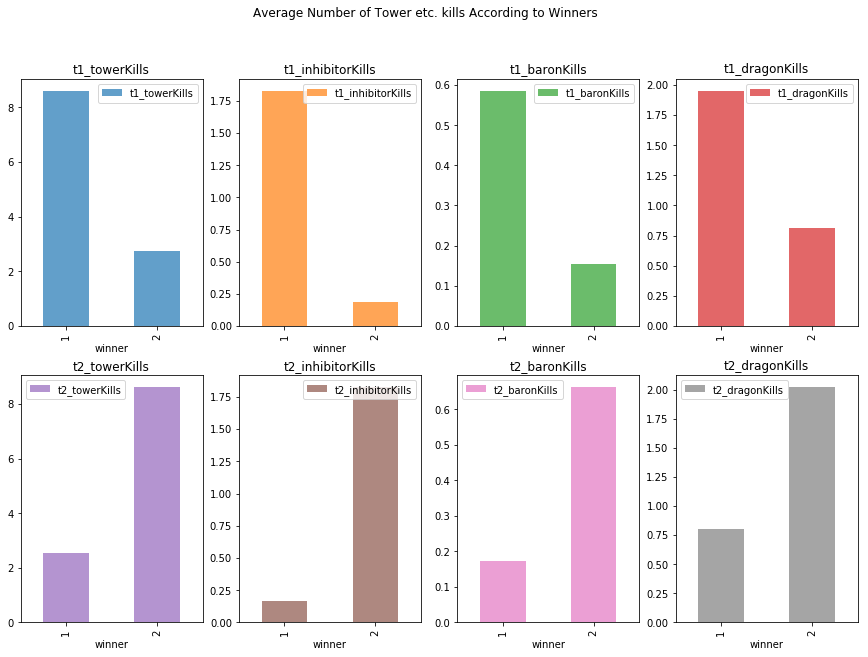

In [9]:
f=data_new.groupby("winner").mean().plot(kind="bar",subplots=True,sharex=False,sharey=False,figsize=(15,10),layout=(2,4),alpha=0.7,title="Average Number of Tower etc. kills According to Winners")
f= sns.set_style("darkgrid")
f=sns.set_context("paper")
plt.show()

In [10]:
y = data["winner"].values
x = data.drop(["winner"],axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

<a id="3"></a> <br>
**Decision Tree with Grid Search Method**

To develop best model we searched best parameters. To find that we used Grid Search Method.

In [11]:
criterion=["gini","entropy"]
max_depth=range(1,20,2)
splitter=["best","random"]
dt=DecisionTreeClassifier()
grid_decision_tree=GridSearchCV(estimator=dt,cv=15,param_grid=dict(criterion=criterion,max_depth=max_depth,splitter=splitter))

In [12]:
grid_decision_tree.fit(x_train,y_train)
print("best score: ", grid_decision_tree.best_score_)
print("best param: ", grid_decision_tree.best_params_)

best score:  0.9693174876436941
best param:  {'criterion': 'entropy', 'max_depth': 7, 'splitter': 'best'}


And we found best parameters : criterion parameter as entropy , max depth is 7 and splitter is best. And then we test our model.

In [13]:
dt2=DecisionTreeClassifier(criterion="entropy",max_depth=7, splitter="best")
dt2.fit(x_train,y_train)
print("score:", dt2.score(x_test,y_test))

score: 0.9663103336572725


Our model is working with about 97% accuracy. Following figure shows decision tree:

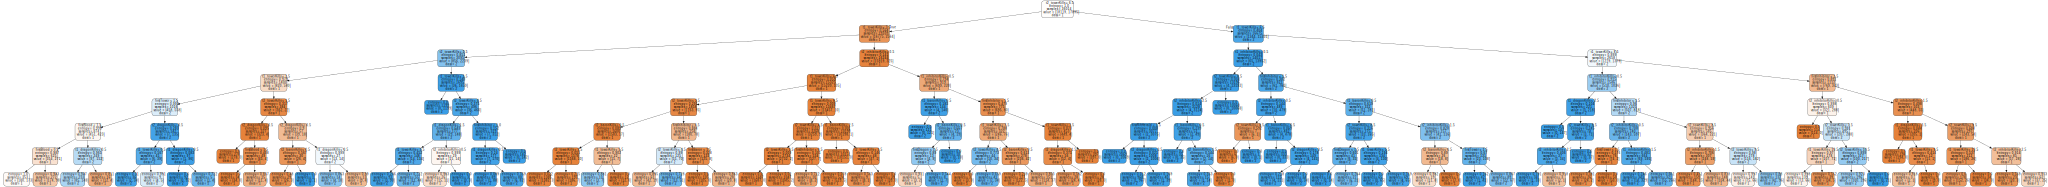

In [14]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(dt2, out_file=None, feature_names=x.columns,class_names=["1","2"], 
                     filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

To evaluate our model, I used confusion matrix and classification report.

In [15]:
from sklearn.metrics import confusion_matrix,classification_report
predicted_values = dt2.predict(x_test)
cm=confusion_matrix(y_test,predicted_values)
cr=classification_report(y_test,predicted_values)
print('Classification report : \n',cr)

Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.97      0.97      7917
           2       0.97      0.96      0.97      7518

   micro avg       0.97      0.97      0.97     15435
   macro avg       0.97      0.97      0.97     15435
weighted avg       0.97      0.97      0.97     15435



Text(0.5, 14.7, 'y_head')

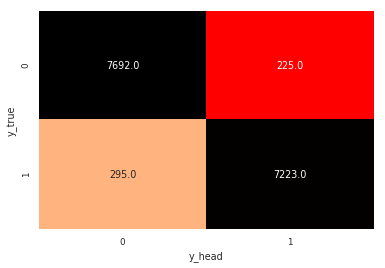

In [16]:
g1 = sns.heatmap(cm,annot=True,fmt=".1f",cmap="flag",cbar=False)
g1.set_ylabel('y_true')
g1.set_xlabel('y_head')

As seen in the confusion matrix, our models knew 226 matches which win First team as  Second Team. Also it knew 295 matches which win Second Team as First Team. Now let's implement.

<a id="4"></a> <br>
**LET'S TRY!**

Let's say:

First team took First Blood, First Tower, First Baron, First Dragon and First Rift Herald and Second team only took First Inhibitor. And 

Team1 numbers of tower, inhibitor, Baron and dragon kills are 10,2,1,4 respectively and

Team2 numbers of tower, inhibitor, Baron and dragon kills are 7,2,1,1 respectively.


In [17]:
scenario={"feature":["first_blood","first_tower","first_inhibitor","first_Baron","first_Dragon","first_RiftHerald",
"t1_tower","t1_inhibitor","t1_baron","t1_dragon","t2_tower","t2_inhibitor","t2_baron","t2_dragon"],
         "value":[1,1,2,1,1,1,10,2,1,4,7,2,1,1]}
scen=pd.DataFrame(scenario)
scen.T

0            1     ...            12         13
feature  first_blood  first_tower    ...      t2_baron  t2_dragon
value              1            1    ...             1          1

[2 rows x 14 columns]

In [18]:
x1=[[1,1,2,1,1,1,10,2,1,4,7,2,1,1]]
c=dt2.predict_proba(x1).reshape(-1,1)
print("winner is :" , dt2.predict(x1) )
print("first team win probability is % ", list(c[0]*100),"\nsecond team win probability is %:",list(c[1]*100)  )

winner is : [1]
first team win probability is %  [85.39325842696628] 
second team win probability is %: [14.606741573033707]


Our model says The winner will be First Team with 85% probability.

WHAT HAPPENED EARLY SURRENDER SITUATION?

In addition, at the beginning of the LOL game players can give an early surrender as a result of AFK. In this case, if the first blood is not shed, our model predicts the result of the match as 51% - 49%.

In [19]:
x2=[[0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
c=dt2.predict_proba(x2).reshape(-1,1)
print("winner is :" , dt2.predict(x2) )
print("first team win probability is % ", list(c[0]*100),"\nsecond team win probability is %:",list(c[1]*100)  )

winner is : [1]
first team win probability is %  [50.991501416430594] 
second team win probability is %: [49.008498583569406]
